<a href="https://colab.research.google.com/github/SherylPhilip/The-Sparks-Foundation-Internship/blob/main/Task_3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation (Data Science and Business Analytics Intern #GRIPJUNE21)**

**Exploratory Data Analysis - Retail**

**Author : Sheryl Philip**

● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can
work to make more profit.

● What all business problems you can derive by exploring the data?




**Loading the required libraries**

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**Creating a Dataframe**

In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/Python files/SampleSuperstore (1).csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


# **Data Pre- Processing**

In [4]:
#Checking for the dimension of the dataset
df.shape

(9994, 13)

In [5]:
# Checking for the datatypes
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000




*   Describe Function shows the continous variables in the dataset
*   In Sales and Profit , the difference between the 75% and max is quite high which indicates there exist outliers in the dataset.



In [8]:
df.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


**Number of unique values in each column**

In [9]:
for i in df.columns:
    print(i,len(df[i].unique()))

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


**Checking for null values**

In [10]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
# checking for duplicate values
df.duplicated().sum()

17

In [12]:
# Dropping those duplicate values
df.drop_duplicates()
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
# Removing the unnecessary columns such as postal code
df = df.drop(['Postal Code'],axis=1)

In [14]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# **EXPLORATORY DATA ANALYSIS**

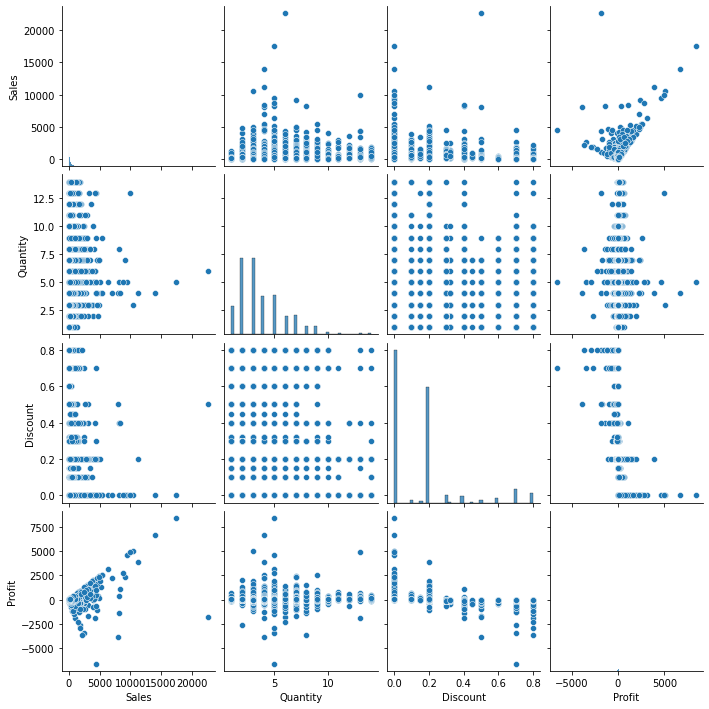

In [15]:
# Visualizing the dataset as a whole using the pair plot
import seaborn as sns
sns.pairplot(df)

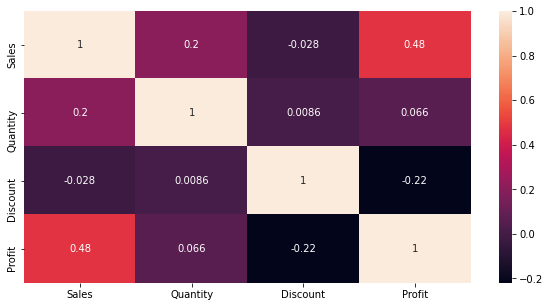

In [16]:
# Finding the pairwise correlations between the columns and visualising using heatmaps
df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

Text(0.5, 1.0, 'Correlation between variables')

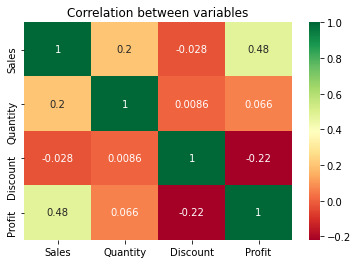

In [17]:
# correlation matrix and heatmap
#Heatmaps are useful to visualize the magnitude of relationship between multiple  variables usig the coreelation matrix.
#Pairs which show high correlation, <-0.75 or >0.75, should be considered and we can eliminate one variable out of the pair leading to fetaure selection.
#value close to 1-->high positive correlation
#value close to -1-->high negative correlation
#value close to 0-->no correlation
dfcorr = df.corr()
sns.heatmap(dfcorr, annot=True, cmap='RdYlGn')
plt.title('Correlation between variables')

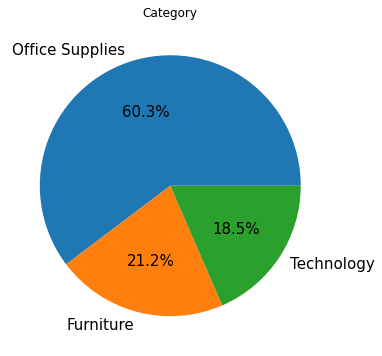

In [18]:
#Visualising the categories
plt.figure(figsize = (6,6))
textprops = {"fontsize":15}
plt.title('Category')
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index,autopct='%1.1f%%',textprops = textprops)
plt.show()

<Figure size 720x1152 with 0 Axes>

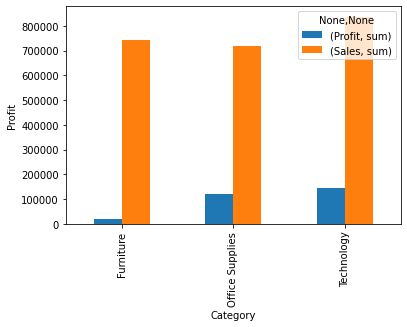

In [19]:
# Bar plot of the category of Profit VS Sales
plt.figure(figsize= (10,16))
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

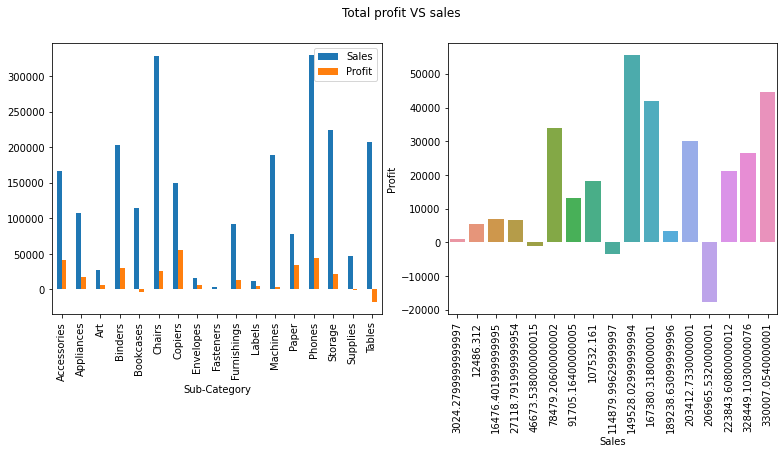

In [20]:
# Checking the profit and loss in the dataset with the Sub Categories
fig,axes = plt.subplots(1,2,figsize=(13,5))
fig.suptitle("Total profit VS sales ")
sns.barplot(data=df.groupby('Sub-Category')['Sales','Profit'].agg(sum),x='Sales',y='Profit',ax=axes[1])
df.groupby('Sub-Category')['Sales','Profit'].agg(sum).plot(kind='bar',ax=axes[0])
plt.xticks(rotation=90)
plt.show()

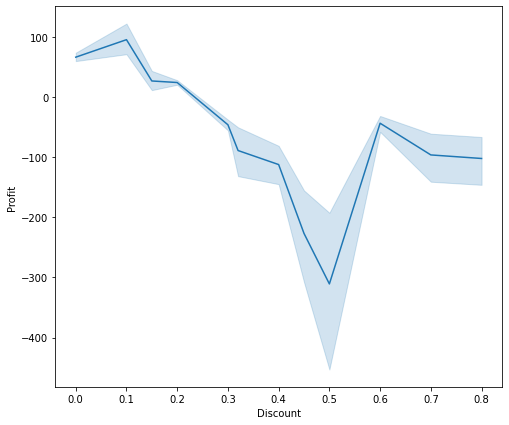

In [21]:
#Visualising the discount
plt.figure(figsize=(8,7))
sns.lineplot(df['Discount'], df['Profit'], data=df)

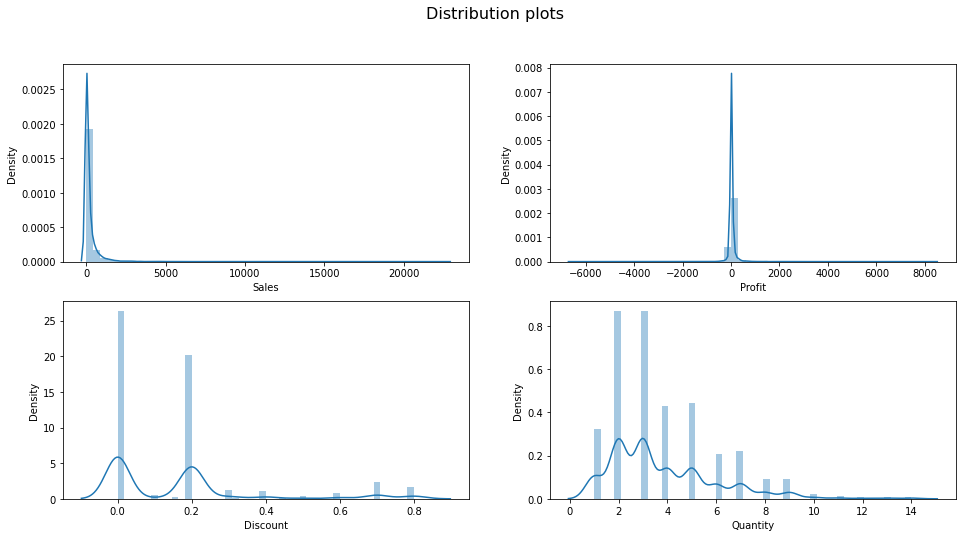

In [22]:
# Comparing with distplot
fig,axes = plt.subplots(2,2,figsize=(16,8))
fig.suptitle("Distribution plots", fontsize=16)
sns.distplot(df['Sales'],ax=axes[0,0])
sns.distplot(df['Profit'],ax=axes[0,1])
sns.distplot(df['Discount'],ax=axes[1,0])
sns.distplot(df['Quantity'],ax=axes[1,1])
plt.show()

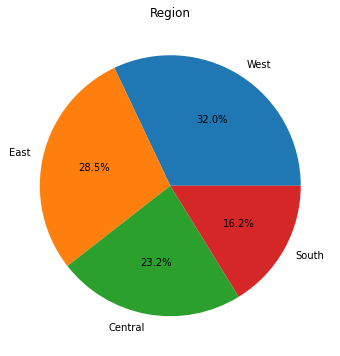

In [23]:
#Visualizing the Sales vs Profits in different Regions
plt.figure(figsize = (6,6))
plt.title('Region')
plt.pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()

**The graph shows that West and East have same Profit though sales in the East are less as compared that of West and the least sales are of the south.**


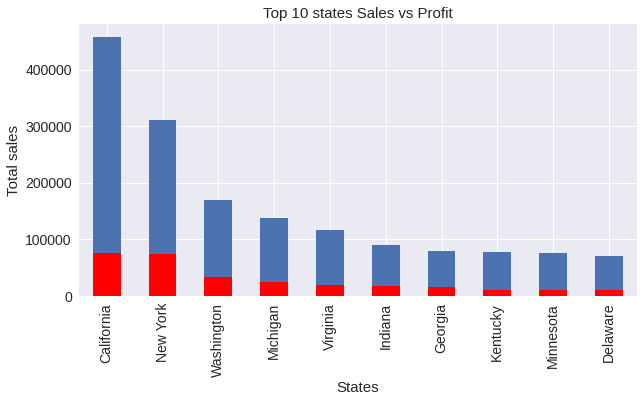

In [24]:
#Visualising the Sales vs Profits in different states
# computing top states in terms of sales from first 10 observations
top_states = df.groupby("State").Sales.sum().nlargest(n=10)

# computing top states in terms of profit from first 10 observations
top_states_p = df.groupby("State").Profit.sum().nlargest(n = 10)

plt.style.use('seaborn')
top_states.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_states_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color = 'red')
plt.xlabel('States',fontsize = 15)
plt.ylabel('Total sales',fontsize = 15)
plt.title("Top 10 states Sales vs Profit",fontsize = 15)
plt.show()

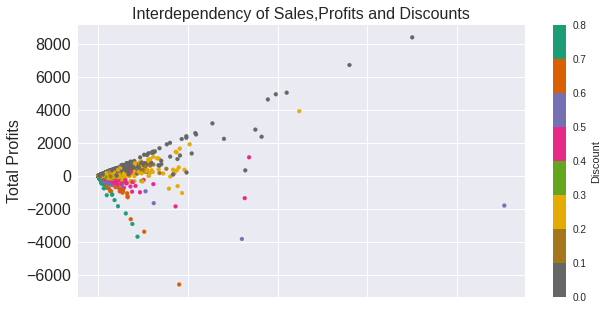

In [25]:
#Checking the interdependency of Sales,Profits and Discounts
plt.style.use('seaborn')
df.plot(kind = "scatter",figsize = (10,5), x = "Sales", y= "Profit", c = "Discount", s = 15,fontsize = 16, colormap = 'Dark2_r')
plt.ylabel('Total Profits',fontsize = 16)
plt.title("Interdependency of Sales,Profits and Discounts",fontsize = 16)

plt.show()

**The graphn gives us an observation that if we increase the discount on the products the sales will increase but the profit will decrease.**

# Conclusion :
The weak areas where one should focus on to make more profit are :

We should limit sales of furniture and focus on the increase in technology ,category product as it will generate maxmum profit.

Office suppliers and furniture has very less profit as compared to sales.

The mode of shipping doesn't affect much to the sales.

Considering the sub-categories it genrates maximum loss , sales of tables should be minimized.
Should increase sales in the east as it gives out more profit.

We should concentrate on improving the sales of the  the states like 'New York' and 'California' to so that we can make more profits.

# **THANK YOU!!**